 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [153]:
from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% !important;} </style>"))
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
mpl.use("pgf")
pgf_with_rc_fonts = {
   "pgf.rcfonts" : False
}
mpl.rcParams.update(pgf_with_rc_fonts)
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import glob
import numpy as np
from scipy import constants as const
import datetime as dt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/tmerten/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [17]:
def fmohl(a,b,q,npp):
    # direct crib from page 126 in handbook
    sum = 0
    du = 1/float(npp)
    u  = np.array([k*du for k in range(npp+1)])
    cp = np.sqrt(a**2+(1-a**2)*u**2)
    cq = np.sqrt(b*b+(1-b*b)*u*u)
    dsum = 2*np.log(q*(1/cp+1/cq)/2) - np.euler_gamma
    dsum = dsum*(1-3*u*u)/(cp*cq)
    dsum[0] = dsum[0]/2.
    dsum[npp] = dsum[npp]/2.
    summ = dsum.sum()
    return 8*np.pi*du*summ

def ibsPiwSmooth(pnumber,epsx,betax,epsy,betay,dponp,r0,betar,gamma0,sigs,ringparams):
    # uses Piwinski's formulae for ibs, pg 126 in handbook
    # smooth lattice approximation
    # dispersion in smoooth approximation
    xdisp = ringparams['circ']/(2*np.pi*ringparams['gammat']**2)
    rmsx  = np.sqrt(epsx*betax)
    rmsy  = np.sqrt(epsy*betay)

    sigh2inv =  (1/dponp**2)  + (xdisp/rmsx)**2
    sigh     =  1/np.sqrt(sigh2inv)

    # get capitol A
    # print sigx,sigy,dponp,beta,sigh
    # classical radius
#     r0   = (qatom**2/aatom)*1.54e-18
    atop = r0*r0*const.c*pnumber
    abot = 64*np.pi*np.pi*betar**3*gamma0**4*epsy*epsx*sigs*dponp
    # ca is Piwinski's A
    ca = atop/abot
    # mohl's a,b,and q
    # a is horizontal, x
    a = sigh*betax/(gamma0*rmsx)
    # b is vertical
    b = sigh*betay/(gamma0*rmsy)
    # log is good enough
    if (rmsx<=rmsy):
         d=rmsx
    else:
         d=rmsy
    q = sigh*betar*np.sqrt(2*d/r0)
    #calculate fmohl(a,b,q) with 1000 points
    npp=1000
    fmohlp = fmohl(a,b,q,npp)
    fmohlx = fmohl(1/a,b/a,q/a,npp)
    fmohly = fmohl(1/b,a/b,q/b,npp)
    alfap0 =ca*fmohlp*(sigh/dponp)**2
    alfax0 =ca*(fmohlx+fmohlp*(xdisp*sigh/rmsx)**2)
    alfay0 =ca*fmohly
    return alfap0,alfax0,alfay0

In [104]:
r0

2.8179403227e-15

In [18]:
r0 = const.physical_constants['classical electron radius'][0]
ringparams = {'circ':240.00839, 'gammat':37.84089447,}

In [105]:
ibsPiwSmooth(1e10,7e-9,1,120e-12,7,0.001,r0,1,3326,0.005,ringparams)

(1.6608189856632383, 0.16877627659208336, 0.0039823251420380767)

In [108]:
1/0.0039823251420380767

251.1095815466789

In [521]:
ftsl=pd.read_csv('/home/tmerten/data/IBS/simadata/ibstable.dat',delim_whitespace=True)
from scipy.interpolate import NearestNDInterpolator

points = ftsl[['V','sigs','ex','ey']].as_matrix()
values = ftsl[['Tl']].T.values[0]
myInterpolators = NearestNDInterpolator(points, values)
values2 = ftsl[['Tx']].T.values[0]
myInterpolatorx = NearestNDInterpolator(points, values2)
values3 = ftsl[['Ty']].T.values[0]
myInterpolatory = NearestNDInterpolator(points, values3)

In [522]:
ftsl[(ftsl['sigs']==5) & (ftsl['V']>1.9)].head(50)

,V,sigs,ex,ey,npart,Tl,Tx,Ty
5200,1.9,5,1,1,1.000000e+10,0.014068,0.003491,0.014831
5201,1.9,5,1,101,1.000000e+10,0.179436,0.047808,109.030663
5202,1.9,5,1,201,1.000000e+10,0.279025,0.073745,1133.818613
5203,1.9,5,1,301,1.000000e+10,0.364196,0.095615,-4988.132483
5204,1.9,5,1,401,1.000000e+10,0.441511,0.115273,-2385.903743
5205,1.9,5,1,501,1.000000e+10,0.513621,0.133467,-2225.410194
5206,1.9,5,1,601,1.000000e+10,0.581927,0.150594,-2330.340237
5207,1.9,5,1,701,1.000000e+10,0.647280,0.166893,-2525.920143
5208,1.9,5,1,801,1.000000e+10,0.710248,0.182524,-2767.679989
5209,1.9,5,1,901,1.000000e+10,0.771229,0.197600,-3038.885491


In [394]:
values3

array([  4.97098090e-03,   8.22564583e+02,  -5.57383847e+02, ...,
         4.38207832e+03,   1.00961708e+04,   1.88085612e+04])

In [501]:
for j in np.linspace(1.0,2.0,10):
    print(myInterpolatory(j,5,7,120))

493.713031
498.6826465
503.2565202
507.4958098
511.4476558
518.631548
521.9189916
525.0327822
527.9907251
527.9907251


In [137]:
myInterpolatorx(2.0,5,7,120)

0.69789080459999997

In [534]:
gamma   = 3326.817037
betar   = np.sqrt( 1 - ( 1 / gamma**2 ) )
trev    = 240.00839 / ( betar * const.c )
frev    = 1/ trev
h0      = 400
v0      = 2e6
gammatr = 37.841888
eta     = ( 1/ gammatr**2 ) - ( 1 / gamma**2 )
p0      = 1.7e9
phis    = -np.arcsin(172443/v0)
nus     = np.sqrt( abs( h0 * eta * (-1) ) / ( 2 * np.pi * betar * p0 ) * ( v0 * np.cos(phis) ) )
omega0  = 2 * np.pi / trev
sigs    = 0.005
sige    = nus * omega0 * sigs / ( const.c * eta)


ex = {0:7e-9}
ey = {0:120e-12}
sigs = {0:0.005}
dt = 1000/(1.25e6)
tauradx = 0.0079
taurady = 0.007
taurads = 0.0039
exinf = 8.667e-9
eyinf = 2.55e-13
sigsinf = eta * const.c / (0.0065 * omega0) * np.sqrt(const.c * 1.65092e-15)
np0 = 1e10
npinter=1e10
for i in range(1,4000):
#     tausibs,tauxibs, tauyibs  = ibsPiwSmooth(np0,ex[i-1],1.04,ey[i-1],7.1,0.002,r0,betar,gamma,sigs[i-1],ringparams)
    tausibs = myInterpolators(2.,sigs[i-1]*1e3,ex[i-1]*1e9,ey[i-1]*1e12)*npinter/np0
    tauxibs = myInterpolatorx(2.,sigs[i-1]*1e3,ex[i-1]*1e9,ey[i-1]*1e12)*npinter/np0
    tauyibs = myInterpolatory(2.,sigs[i-1]*1e3,ex[i-1]*1e9,ey[i-1]*1e12)*npinter/np0
    ex[i] = ex[i-1] * np.exp(-2*dt*i*(1/tauradx-1/tauxibs)) + exinf * (1 - np.exp(-2*dt*i/tauradx))
    ey[i] = ey[i-1] * np.exp(-2*dt*i*(1/taurady-1/tauyibs)) + eyinf * (1 - np.exp(-2*dt*i/taurady)) 
    sigs[i] = sigs[i-1] * np.exp(-dt*i*(1/taurads-1/tausibs)) + sigsinf * (1 - np.exp(-2*dt*i/taurads)) 
print(taurads)
print(tauradx)
print(taurady)
print(tausibs)
print(tauxibs)
print(tauyibs)

0.0039
0.0079
0.007
0.02904500891
0.06275412069
0.04120845252


In [ ]:
279.009667198
139.340948902
163.45469306


In [398]:
myInterpolatory(2.,sigs[i-1]*1e3,ex[i-1]*1e9,ey[i-1]*1e12)*npinter/np0

65.998840637499995

In [315]:
-2*dt*i/tauradx+2*i*dt/tauxibs

-0.017281007246068104

In [377]:
tausibs,tauxibs, tauyibs

(0.0080615000587500006, 0.053832951376277485, 0.034990772412131076)

In [192]:
np.sqrt(ex[6999]*0.43)*1e6

65.259233388955479

In [447]:
ex2 = ex
ey2 = ey
sigs2 = sigs

In [445]:
ex1 = ex
ey1 = ey
sigs1 = sigs

In [93]:
np.sqrt(1.5e-7*0.43)*1e6

253.96850198400588

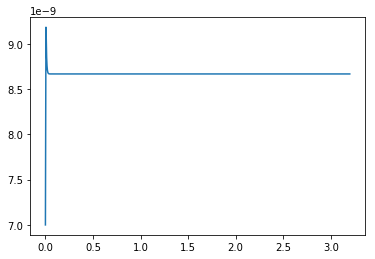

In [535]:
%matplotlib inline
plt.plot(np.array(list(ex.keys()))*dt,np.array(list(ex.values())))
# plt.plot(np.array(list(ex1.keys()))*dt,np.array(list(ex1.values())))
# plt.plot(np.array(list(ex2.keys()))*dt,np.array(list(ex2.values())))
# plt.ylim(0,2e-8)
plt.show()

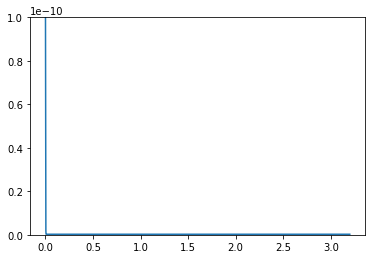

In [541]:
%matplotlib inline
plt.plot(np.array(list(ey.keys()))*dt,np.array(list(ey.values())))
# plt.plot(np.array(list(ey1.keys()))*dt,np.array(list(ey1.values())))
# plt.plot(np.array(list(ey2.keys()))*dt,np.array(list(ey2.values())))
plt.ylim(0,1e-10)
plt.show()

In [167]:
np.sqrt(2e-11*20)*1e6

20.0

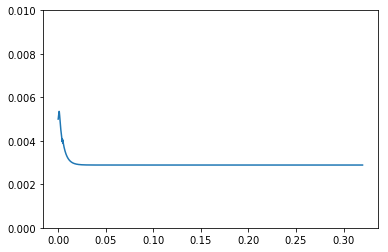

In [529]:
%matplotlib inline
plt.plot(np.array(list(sigs.keys()))*dt,np.array(list(sigs.values())))
# plt.plot(np.array(list(sigs1.keys()))*dt,np.array(list(sigs1.values())))
# plt.plot(np.array(list(sigs2.keys()))*dt,np.array(list(sigs2.values())))
# plt.ylim(0,.01)
plt.ylim(0,.01)
plt.show()